# Big Billion Day Mobile price Analysis

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.stats import norm

In [2]:
glob.glob('C:/Users/manju/OneDrive/Desktop/Big billion Mobile price/mobile_*.csv')

['C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_22_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_23_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_24_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_25_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_26_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_27_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_28_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_29_09_2022.csv',
 'C:/Users/manju/OneDrive/Desktop/Big billion Mobile price\\mobile_30_09_2022.csv']

In [5]:
 all_dfs = []
for file_name in glob.glob('C:/Users/manju/OneDrive/Desktop/Big billion Mobile price/mobile_*.csv'):
        new_df = pd.read_csv(file_name , 
                             usecols =['name','offer_price','original_price','off_now','total_ratings','total_ratings','rating','created_at'])
        all_dfs.append(new_df)

In [6]:
len(all_dfs)

9

In [19]:
df = pd.concat(all_dfs)
df.columns

Index(['name', 'offer_price', 'original_price', 'off_now', 'total_ratings',
       'rating', 'created_at'],
      dtype='object')

In [20]:
df

,name,offer_price,original_price,off_now,total_ratings,rating,created_at
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",11999,"₹14,999",20% off,17519,4.4,2022-09-22 14:30:41.940553+05:30
1,"APPLE iPhone 13 (Starlight, 128 GB)",69900,69900,0,12716,4.6,2022-09-22 14:30:41.941551+05:30
2,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",11999,"₹14,999",20% off,17519,4.4,2022-09-22 14:30:41.941551+05:30
3,"APPLE iPhone 11 (White, 64 GB)",43900,43900,0,96244,4.6,2022-09-22 14:30:41.941551+05:30
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",11999,"₹14,999",20% off,17519,4.4,2022-09-22 14:30:41.942551+05:30
...,...,...,...,...,...,...,...
931,IAIR D22,1120,1120,0,15,4.1,2022-09-30 20:56:51.518201+05:30
932,KARBONN K9 SHAKTI,1469,1469,0,85,3.6,2022-09-30 20:56:52.003545+05:30
933,IAIR D23,1099,1099,0,31,4.1,2022-09-30 20:56:52.363084+05:30
934,"Mi 11 Lite (Vinyl Black, 128 GB)",21999,25999,15% off,5934,4.2,2022-09-30 20:56:52.862586+05:30


In [18]:
df.dtypes

name               object
offer_price         int64
original_price     object
off_now            object
total_ratings       int64
rating            float64
created_at         object
dtype: object

# Cleaning and Processing Data

In [43]:
df['original_price'] = df['original_price'].replace({'₹':''}, regex = True)
df.original_price

0      14,999
1       69900
2      14,999
3       43900
4      14,999
        ...  
931      1120
932      1469
933      1099
934     25999
935      1319
Name: original_price, Length: 8424, dtype: object

In [44]:
df['original_price'] = df['original_price'].replace({',':''}, regex = True)
df.original_price

0      14999
1      69900
2      14999
3      43900
4      14999
       ...  
931     1120
932     1469
933     1099
934    25999
935     1319
Name: original_price, Length: 8424, dtype: object

In [46]:
df['off_now'] = df.off_now.replace({'off':''}, regex = True)
df

,name,offer_price,original_price,off_now,total_ratings,rating,created_at
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22 14:30:41.940553+05:30
1,"APPLE iPhone 13 (Starlight, 128 GB)",69900,69900,0,12716,4.6,2022-09-22 14:30:41.941551+05:30
2,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22 14:30:41.941551+05:30
3,"APPLE iPhone 11 (White, 64 GB)",43900,43900,0,96244,4.6,2022-09-22 14:30:41.941551+05:30
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22 14:30:41.942551+05:30
...,...,...,...,...,...,...,...
931,IAIR D22,1120,1120,0,15,4.1,2022-09-30 20:56:51.518201+05:30
932,KARBONN K9 SHAKTI,1469,1469,0,85,3.6,2022-09-30 20:56:52.003545+05:30
933,IAIR D23,1099,1099,0,31,4.1,2022-09-30 20:56:52.363084+05:30
934,"Mi 11 Lite (Vinyl Black, 128 GB)",21999,25999,15%,5934,4.2,2022-09-30 20:56:52.862586+05:30


In [47]:
df['original_price'] = pd.to_numeric(df['original_price'])
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df

,name,offer_price,original_price,off_now,total_ratings,rating,created_at
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22
1,"APPLE iPhone 13 (Starlight, 128 GB)",69900,69900,0,12716,4.6,2022-09-22
2,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22
3,"APPLE iPhone 11 (White, 64 GB)",43900,43900,0,96244,4.6,2022-09-22
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",11999,14999,20%,17519,4.4,2022-09-22
...,...,...,...,...,...,...,...
931,IAIR D22,1120,1120,0,15,4.1,2022-09-30
932,KARBONN K9 SHAKTI,1469,1469,0,85,3.6,2022-09-30
933,IAIR D23,1099,1099,0,31,4.1,2022-09-30
934,"Mi 11 Lite (Vinyl Black, 128 GB)",21999,25999,15%,5934,4.2,2022-09-30


In [48]:
df.dtypes

name               object
offer_price         int64
original_price      int64
off_now            object
total_ratings       int64
rating            float64
created_at         object
dtype: object

In [75]:
df.sort_values('original_price' , ascending = False).head(20)

,name,offer_price,original_price,off_%,total_ratings,rating,created_at
632,"APPLE iPhone 14 Pro (Silver, 1 TB)",179900,179900,0,58,4.7,2022-09-22
918,"APPLE iPhone 13 Pro (Gold, 512 GB)",129990,149900,13,831,4.6,2022-09-25
878,"APPLE iPhone 13 Pro (Gold, 512 GB)",129990,149900,13,824,4.6,2022-09-24
846,"APPLE iPhone 13 Pro (Gold, 512 GB)",129990,149900,13,824,4.6,2022-09-24
830,"APPLE iPhone 13 Pro Max (Silver, 256 GB)",119990,139900,14,1248,4.6,2022-09-24
905,"APPLE iPhone 13 Pro Max (Graphite, 256 GB)",119990,139900,14,1336,4.6,2022-09-27
680,"APPLE iPhone 13 Pro Max (Alpine Green, 256 GB)",119990,139900,14,1281,4.6,2022-09-25
785,"APPLE iPhone 13 Pro Max (Alpine Green, 256 GB)",119990,139900,14,1336,4.6,2022-09-27
728,"APPLE iPhone 13 Pro Max (Graphite, 256 GB)",119990,139900,14,1281,4.6,2022-09-25
609,"APPLE iPhone 13 Pro Max (Sierra Blue, 256 GB)",119990,139900,14,1248,4.6,2022-09-23


In [ ]:
deleteRow = df[df['original_price'] == 0].index
df.drop(deleteRow, inplace=True)

In [55]:
df.sort_values('original_price' , ascending = False).tail()

,name,offer_price,original_price,off_now,total_ratings,rating,created_at
789,Salora VOLT 2,749,749,0,4460,3.9,2022-09-29
748,Salora VOLT 2,749,749,0,4454,3.9,2022-09-28
830,GFive U707,749,749,0,10453,3.6,2022-09-22
876,ANGAGE A2320,729,729,0,29,3.6,2022-09-23
924,ANGAGE A2320,729,729,0,31,3.5,2022-09-26


In [61]:
df['off_now'] = df.off_now.replace({'%':''}, regex = True)

In [62]:
df['off_now'] = pd.to_numeric(df['off_now'])


In [ ]:
df = df.rename(columns = {'off_now': 'off_%'})

In [69]:
df.sort_values('off_%' , ascending = False).head(50)

,name,offer_price,original_price,off_%,total_ratings,rating,created_at
188,Micromax X746,999,2499,60,15687,4.0,2022-09-25
144,Micromax X746,999,2499,60,16154,4.0,2022-09-27
186,Micromax X746,999,2499,60,15687,4.0,2022-09-24
233,Micromax X748,999,2499,60,2049,4.1,2022-09-25
169,Micromax X746,999,2499,60,16059,4.0,2022-09-26
187,Micromax X746,999,2499,60,15687,4.0,2022-09-24
184,Micromax X748,999,2499,60,2049,4.1,2022-09-27
262,Micromax X748,999,2499,60,2042,4.1,2022-09-24
141,Micromax X746,999,2499,60,15687,4.0,2022-09-22
201,Micromax X748,999,2499,60,2009,4.1,2022-09-23


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8415 entries, 0 to 935
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8415 non-null   object 
 1   offer_price     8415 non-null   int64  
 2   original_price  8415 non-null   int64  
 3   off_%           8415 non-null   int64  
 4   total_ratings   8415 non-null   int64  
 5   rating          8415 non-null   float64
 6   created_at      8415 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 525.9+ KB


In [71]:
df.describe()

,offer_price,original_price,off_%,total_ratings,rating
count,8415.000000,8415.000000,8415.000000,8415.000000,8415.000000
mean,11828.087225,14508.896732,12.784551,20457.445989,4.055781
std,15146.459783,18508.438162,13.111235,52724.742225,0.671764
min,719.000000,729.000000,0.000000,0.000000,0.000000
25%,1319.000000,1399.000000,0.000000,130.000000,4.000000
50%,8999.000000,10999.000000,9.000000,2016.000000,4.200000
75%,15499.000000,19273.000000,23.000000,14767.000000,4.300000
max,179900.000000,179900.000000,60.000000,570856.000000,5.000000


In [74]:
df.isnull().sum()

name              0
offer_price       0
original_price    0
off_%             0
total_ratings     0
rating            0
created_at        0
dtype: int64

In [119]:
N = 1
df.groupby('name').head(N).reset_index(drop=True).sort_values(['original_price'], ascending=False)


,name,offer_price,original_price,off_%,total_ratings,rating,created_at
419,"APPLE iPhone 14 Pro (Silver, 1 TB)",179900,179900,0,58,4.7,2022-09-22
865,"APPLE iPhone 13 Pro (Gold, 512 GB)",129990,149900,13,824,4.6,2022-09-24
666,"APPLE iPhone 13 Pro Max (Alpine Green, 256 GB)",119990,139900,14,1248,4.6,2022-09-23
754,"APPLE iPhone 13 Pro Max (Gold, 256 GB)",119990,139900,14,1248,4.6,2022-09-23
516,"APPLE iPhone 13 Pro Max (Silver, 256 GB)",139900,139900,0,1248,4.6,2022-09-22
...,...,...,...,...,...,...,...
961,BlackZone PRITHVI,779,779,0,795,3.6,2022-09-28
329,Grabo ECO 1.8,719,759,5,958,3.7,2022-09-22
960,Salora VOLT 2,749,749,0,4454,3.9,2022-09-28
549,GFive U707,749,749,0,10453,3.6,2022-09-22


In [120]:
df.sort_values('total_ratings' , ascending = False).head(20)

,name,offer_price,original_price,off_%,total_ratings,rating,created_at
166,"REDMI 9i (Midnight Black, 64 GB)",7549,9999,24,570856,4.3,2022-09-30
192,"REDMI 9i (Midnight Black, 64 GB)",7549,9999,24,570852,4.3,2022-09-29
426,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,570666,4.3,2022-09-27
400,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,570531,4.3,2022-09-26
422,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,570379,4.3,2022-09-25
407,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,570221,4.3,2022-09-24
202,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,569954,4.3,2022-09-23
305,"REDMI 9i (Midnight Black, 64 GB)",8999,9999,10,569954,4.3,2022-09-22
698,"REDMI 9i (Sea Blue, 64 GB)",8999,9999,10,569954,4.3,2022-09-22
544,"realme Narzo 20 (Glory Silver, 64 GB)",10499,12999,19,517912,4.3,2022-09-29


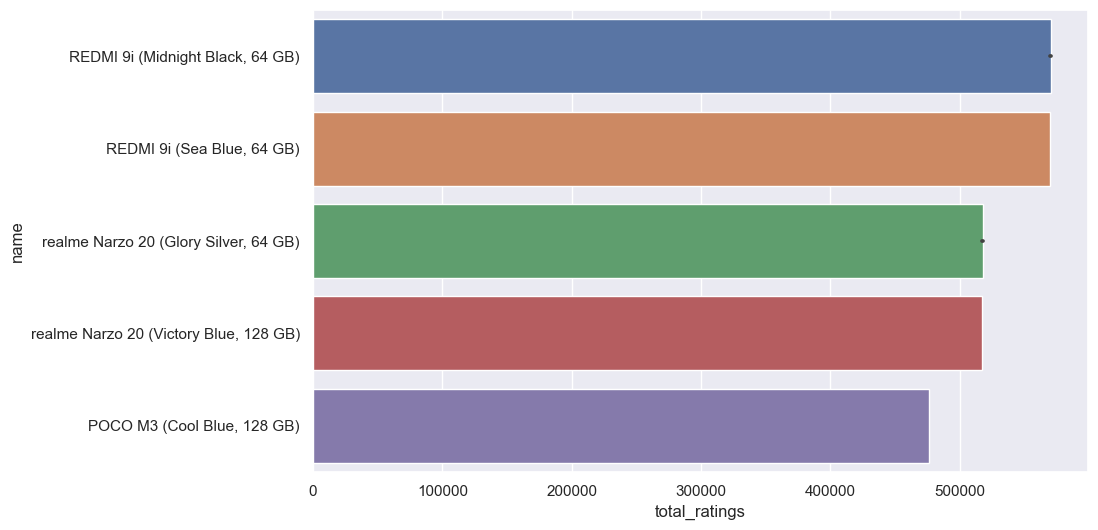

In [128]:
sns.set(rc={'figure.figsize':(10,6)})
x= sns.barplot( x = 'total_ratings', y = 'name', data = df.sort_values('total_ratings', ascending = False).head(20))

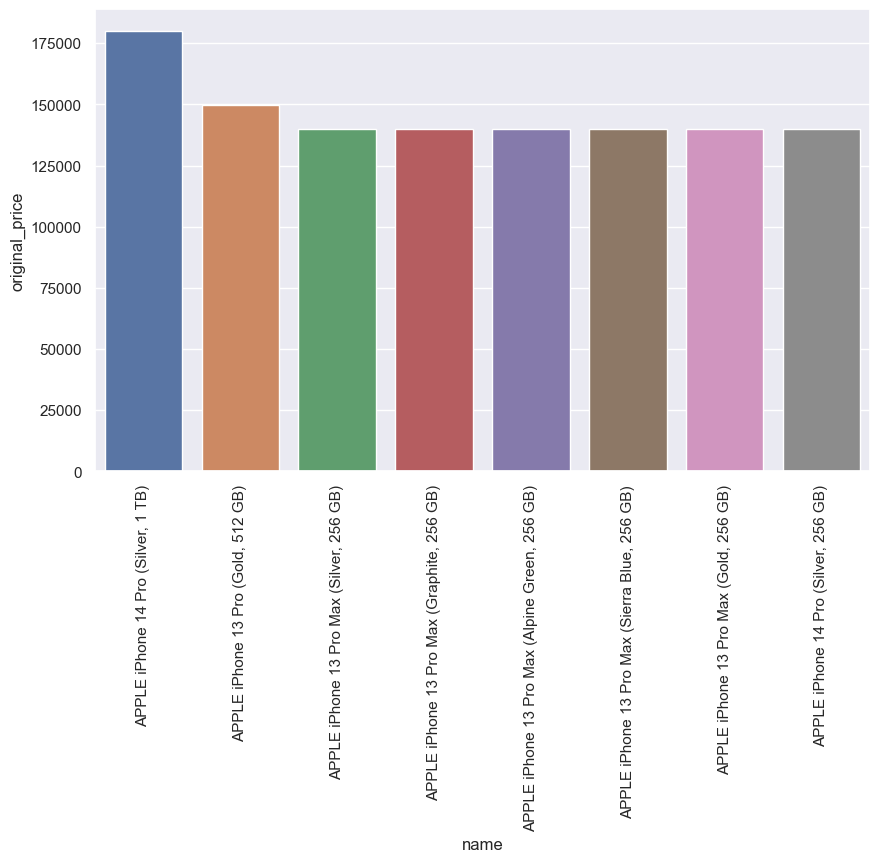

In [131]:
x= sns.barplot( x = 'name', y = 'original_price', data = df.sort_values('original_price', ascending = False).head(20))
x.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='off_%', ylabel='rating'>

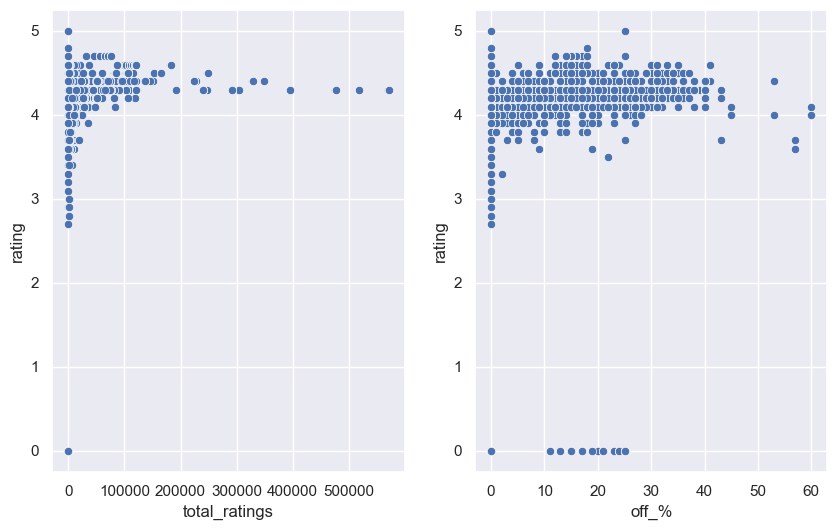

In [137]:
fig, ax = plt.subplots(1,2)
sns.scatterplot( x = 'total_ratings', y = 'rating', data = df, ax = ax[0])
sns.scatterplot( x = 'off_%', y = 'rating', data = df, ax = ax[1])


<AxesSubplot:xlabel='rating', ylabel='off_%'>

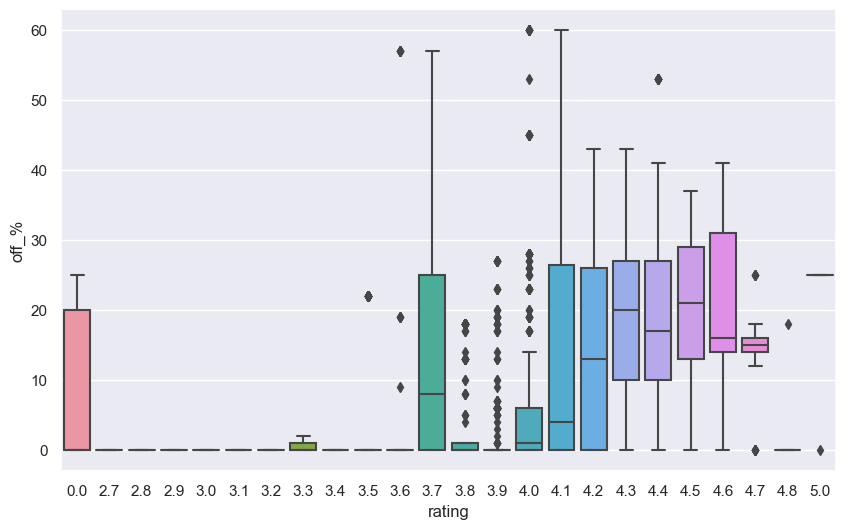

In [140]:
sns.boxplot(data=df, y="off_%", x="rating",  dodge=False)

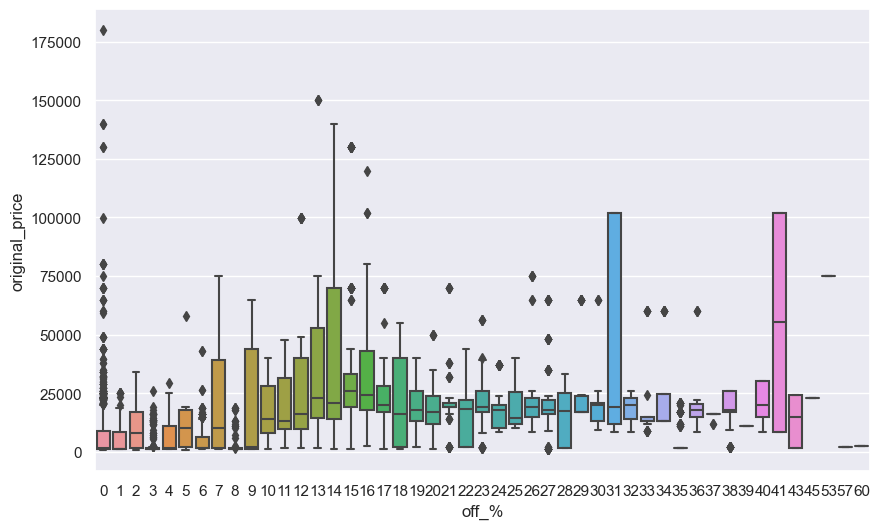

In [145]:
sns.boxplot(data=df, y="original_price", x="off_%",  dodge=False)


<AxesSubplot:xlabel='off_%', ylabel='created_at'>

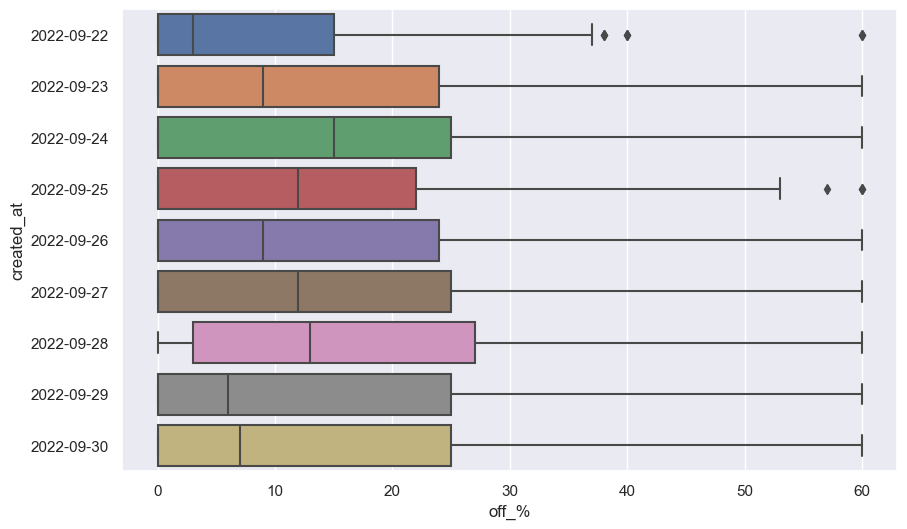

In [150]:
sns.boxplot(data=df, y="created_at", x="off_%",  dodge=False)


In [152]:
corrmat = df.corr()
corrmat

C:\Users\manju\AppData\Local\Temp\ipykernel_6848\2132305434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


,offer_price,original_price,off_%,total_ratings,rating
offer_price,1.000000,0.985392,0.216896,0.100443,0.187160
original_price,0.985392,1.000000,0.318002,0.097071,0.196217
off_%,0.216896,0.318002,1.000000,0.089537,0.193560
total_ratings,0.100443,0.097071,0.089537,1.000000,0.170377
rating,0.187160,0.196217,0.193560,0.170377,1.000000


In [163]:
df.to_csv('Big Billion Day Mobile Price Data Analysis.csv')

# Moving CSV file to Power BI for create further insights 